In [1]:
%cd ..

C:\Users\danie\Projects\sentiment-analysis-challenge


In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as s
import matplotlib.pyplot as plt


import collections
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,15)})

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import string 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("data/labelled_text.csv",encoding='latin-1', names=["id","domain","sentiment","tweet"])


In [4]:
df.shape

(74682, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   domain     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.head(5)

,id,domain,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
print(df.isnull().sum())
df = df.dropna()

id             0
domain         0
sentiment      0
tweet        686
dtype: int64


In [8]:
df["domain"] = df['domain'].astype('str')
df["sentiment"] = df['sentiment'].astype('str')
df["tweet"] = df['tweet'].astype('str')

In [9]:
df.sample(n=10)

,id,domain,sentiment,tweet
12466,8542,NBA2K,Negative,RT Where'd Down he Go? 11 GOAT Larry Bird
5118,80,Amazon,Neutral,14.39 Carats TCW 100% Natural Beautiful Amethy...
41665,1549,Battlefield,Irrelevant,A spell for Battlefield 4 players has arrived ...
22343,4223,CS-GO,Neutral,this one game in the group study!.. In these f...
45815,11864,Verizon,Neutral,Verizon's
37382,5210,Hearthstone,Neutral,.. Playing... Fech.tv / MorningStarGG... Like ...
68782,3777,Cyberpunk2077,Positive,3 This chair is indeed incredible! I WANT!!!
56365,11273,TomClancysRainbowSix,Positive,I'm really excited about the new changes in @ ...
41469,1515,Battlefield,Neutral,This is war politics
58315,11598,TomClancysRainbowSix,Negative,@ Rainbow6Game what's going on with this rubbe...


In [10]:
df[df['tweet'].str.contains("<unk>")]

,id,domain,sentiment,tweet
41,2407,Borderlands,Negative,<unk> Gearbox really time to fix this 10 drops...
47,2408,Borderlands,Neutral,Check<unk> this epic streamer!.
57,2410,Borderlands,Negative,why does like<unk> man in borderlands have sli...
87,2415,Borderlands,Positive,FUCK YESSSSSSSS<unk>
131,2422,Borderlands,Irrelevant,do these new @GhostLifestyle<unk> They want dr...
...,...,...,...,...
74583,9184,Nvidia,Neutral,Think im gon screw around with this Nvidia bro...
74603,9187,Nvidia,Positive,<unk> By YouTube: Tips to Put Nvidia Camera on...
74631,9192,Nvidia,Neutral,Save $500 buying the AERO 15 OLED - Award winn...
74655,9196,Nvidia,Negative,Cheap will mean better<unk>!.. techsall.com/go...


<AxesSubplot:>

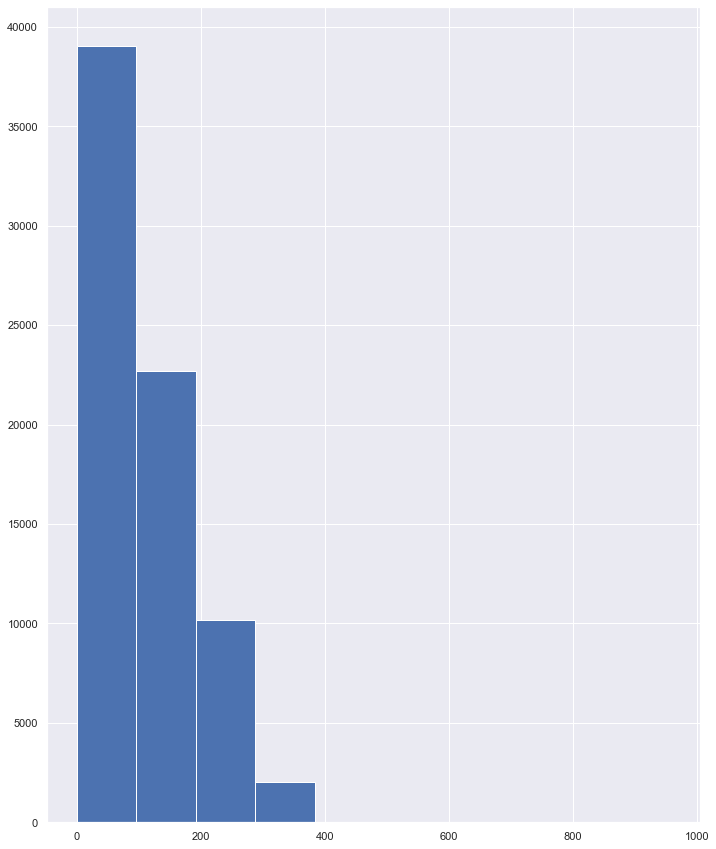

In [11]:
df['tweet'].str.len().hist()

<AxesSubplot:>

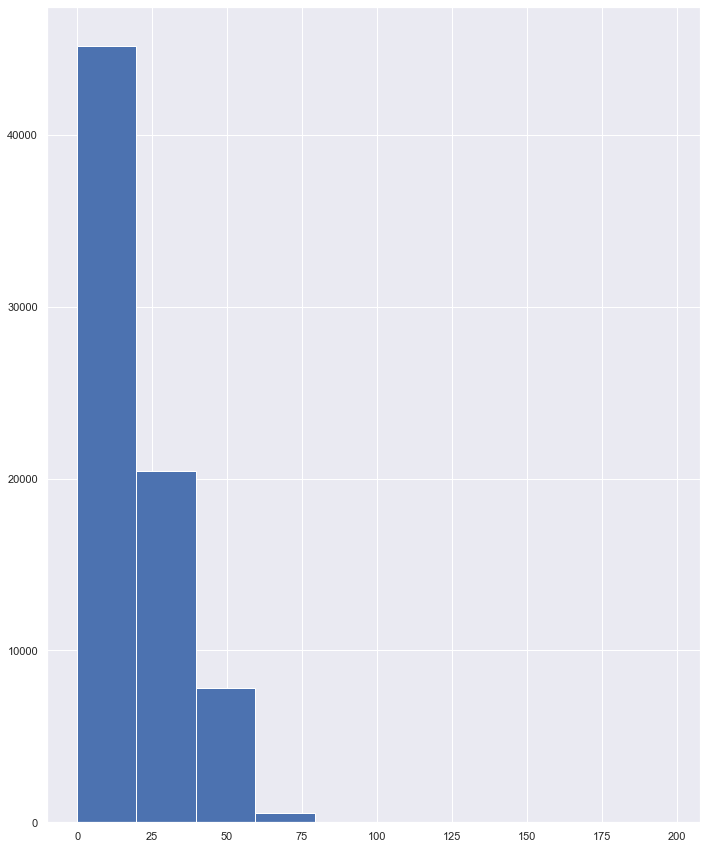

In [12]:
df['tweet'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

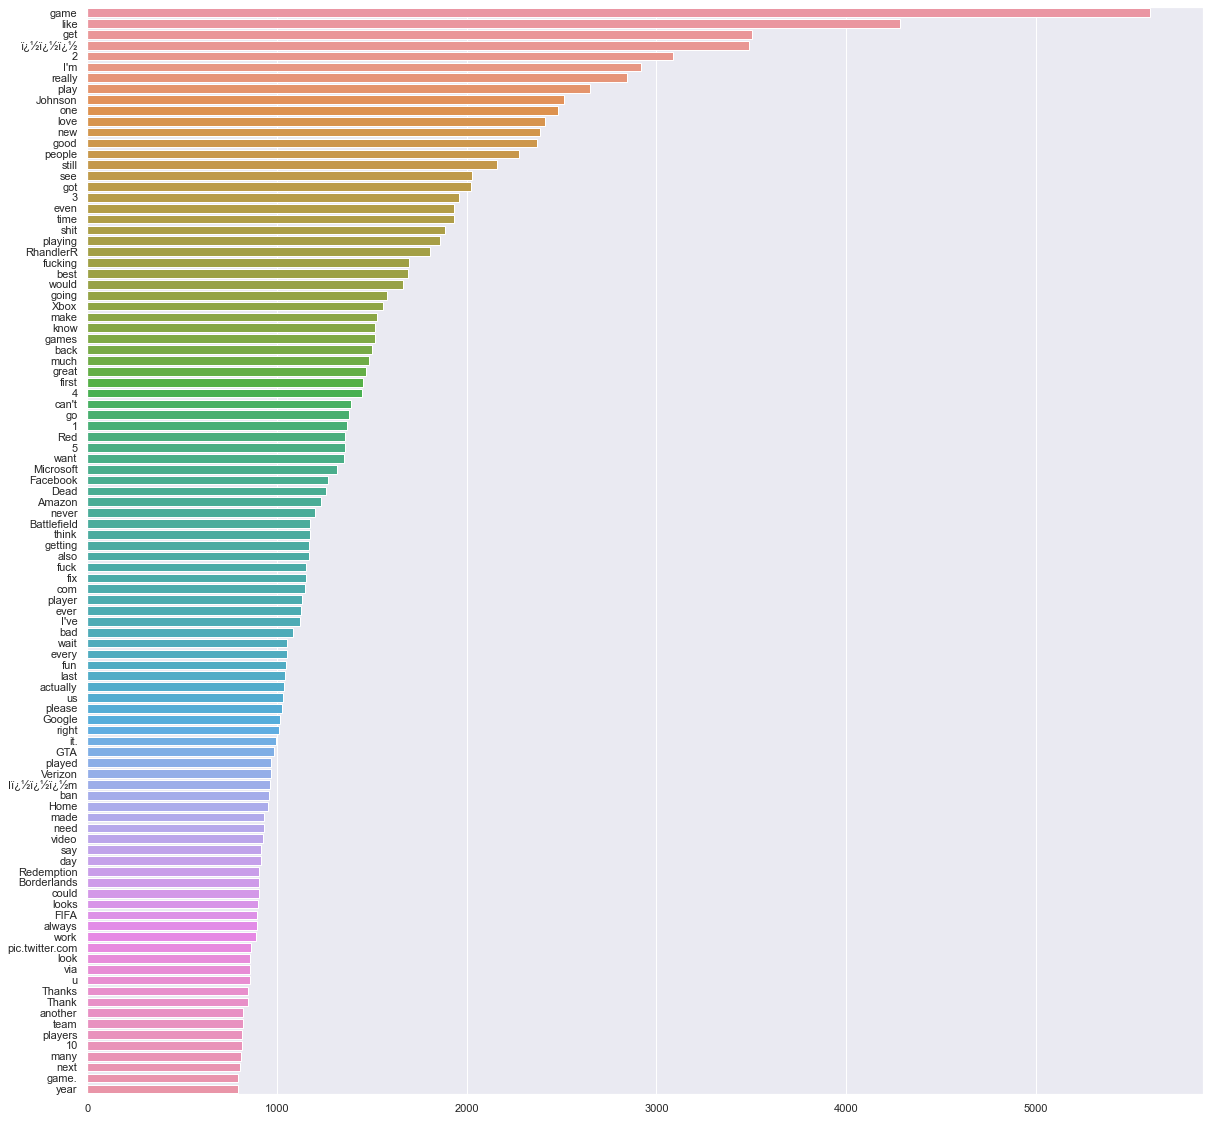

In [13]:

sns.set(rc={'figure.figsize':(20,20)})
corpus=[]
new= df['tweet'].str.split().values.tolist()
corpus=[word for i in new for word in i]

counter=collections.Counter(corpus)
most=counter.most_common()

filtered_most = [(word, count) for (word, count) in most if (word.lower() not in s.words('english')) and (word.lower() not in string.punctuation)   ]

x, y = zip(*filtered_most)

n = 100
x, y = list(x)[:n], list(y)[:n]
        
sns.barplot(x=list(y),y=list(x))

In [14]:
import re
df['tweet']=df['tweet'].apply(lambda x: re.sub('ï¿½', '', x, flags=re.IGNORECASE))
df['tweet']=df['tweet'].apply(lambda x: re.sub('<unk>', '', x, flags=re.IGNORECASE))


In [15]:
ids=df["tweet"]
display(df[ids.isin(ids[ids.duplicated()])])
df = df.drop_duplicates(subset=['tweet'])

,id,domain,sentiment,tweet
11,2402,Borderlands,Positive,was
18,2404,Borderlands,Positive,that was the first borderlands session in a lo...
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
...,...,...,...,...
74616,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74621,9190,Nvidia,Positive,were
74635,9193,Nvidia,Positive,Love EVERYTHING about it.


## Domain

<AxesSubplot:xlabel='domain'>

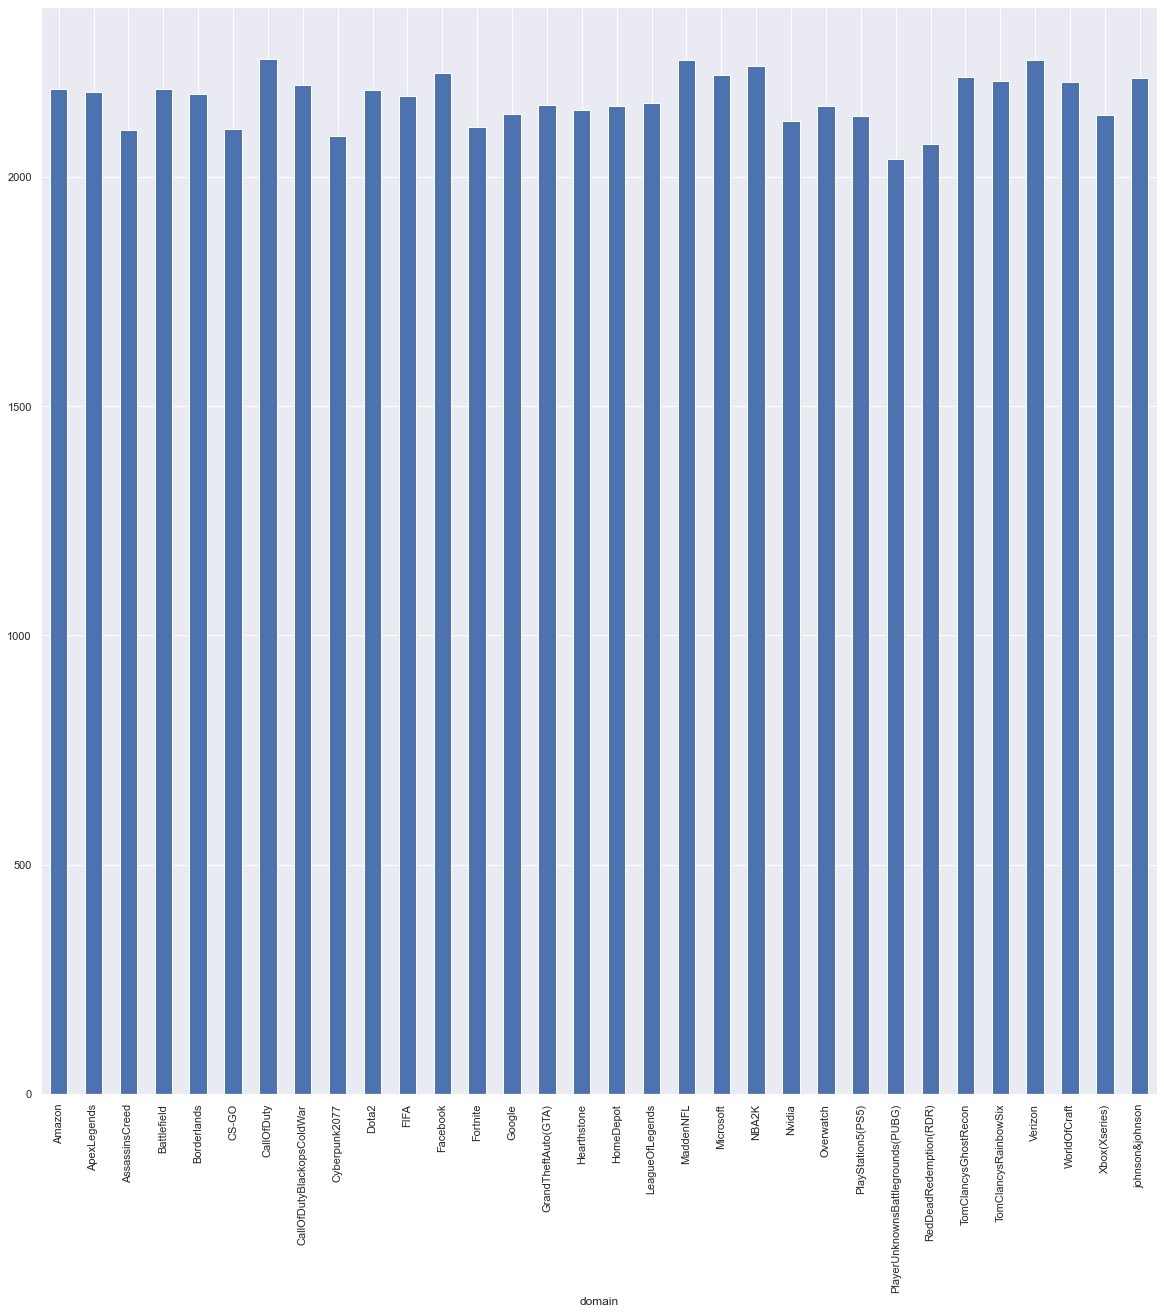

In [16]:
df.groupby('domain').tweet.count().plot.bar()

## Sentiment

<AxesSubplot:ylabel='tweet'>

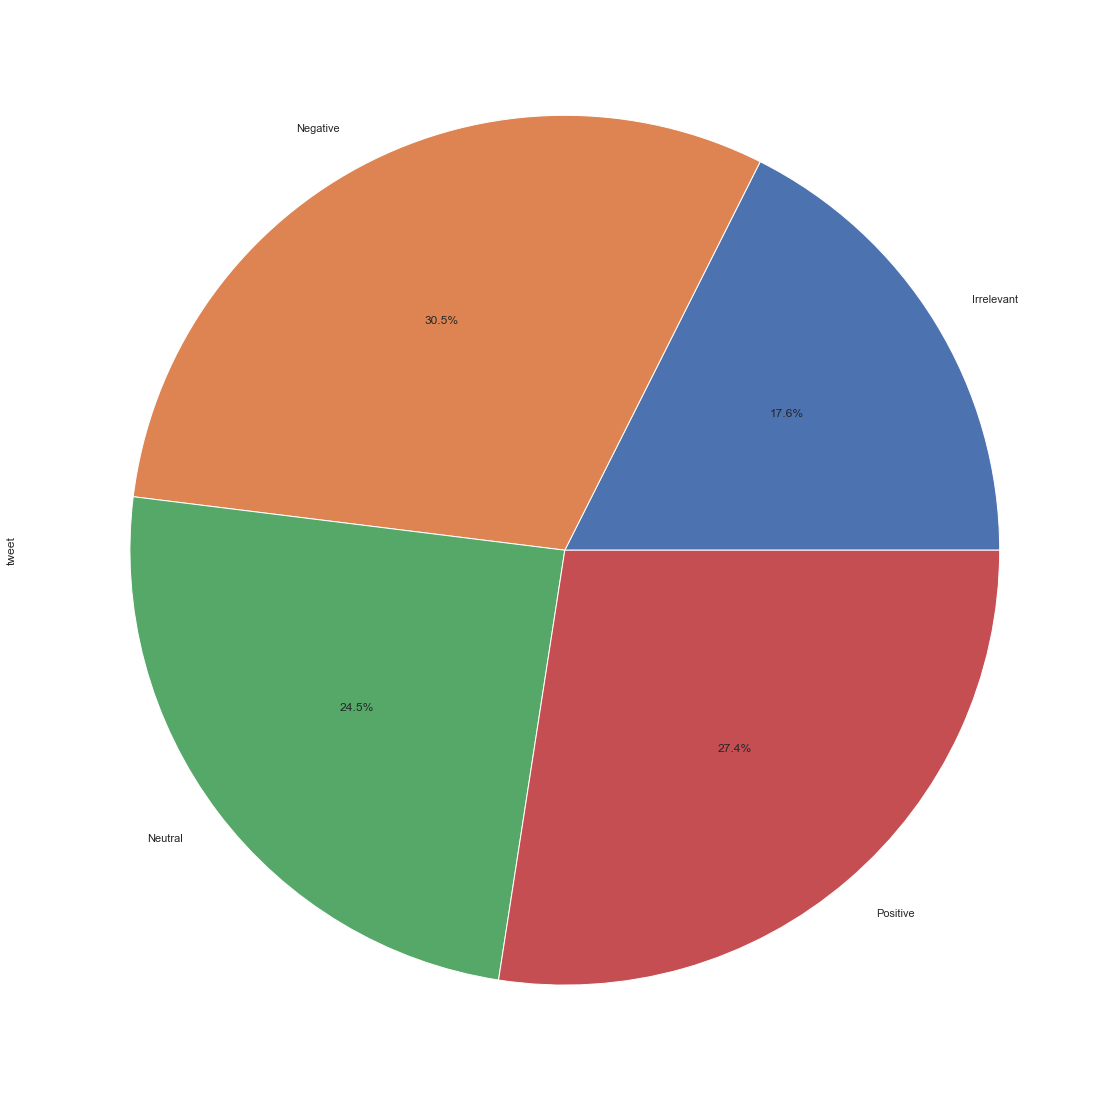

In [17]:
df.groupby('sentiment').tweet.count().plot.pie( autopct='%1.1f%%')

In [18]:
def get_top_ngram(df,col,col_text, n=None, top_n= 10, remove_stopwords=True):
    stopwords=s.words('english')
    sentiments = df[col].unique()
    fig, axes = plt.subplots(1, len(sentiments),figsize=(25,10))
    fig.suptitle(str(n)+'-gram')
    for i, sentiment in enumerate(sentiments):
      corpus = df[df.sentiment == sentiment][col_text].tolist()
      vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
      bag_of_words = vec.transform(corpus)
      sum_words = bag_of_words.sum(axis=0) 
      words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
      words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
      if remove_stopwords:
        words_freq = [(grams, occurence) for (grams, occurence) in words_freq if (grams.split()[0] not in stopwords) or (grams.split()[-1] not in stopwords) ]
      x,y=map(list,zip(*words_freq[:top_n])) 
      sns.barplot(ax=axes[i],x=y,y=x).set(title=sentiment)


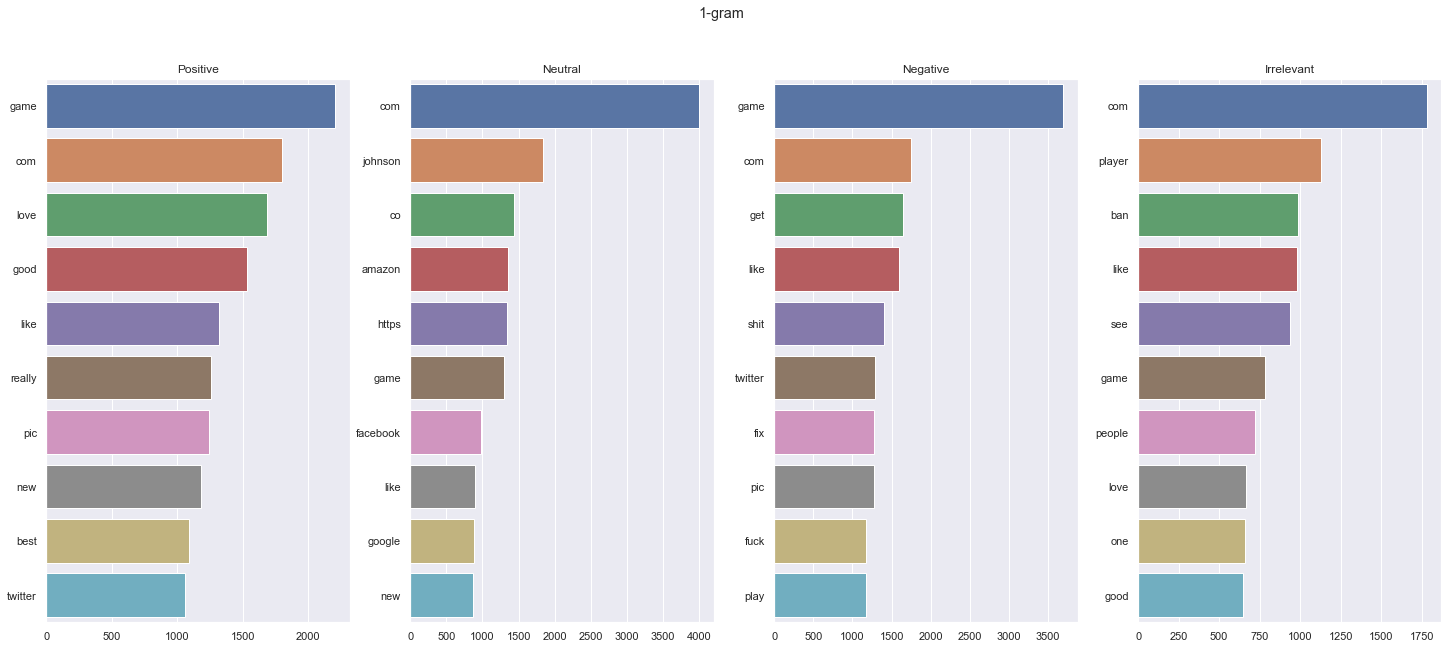

In [19]:
get_top_ngram(df,'sentiment','tweet', n=1)

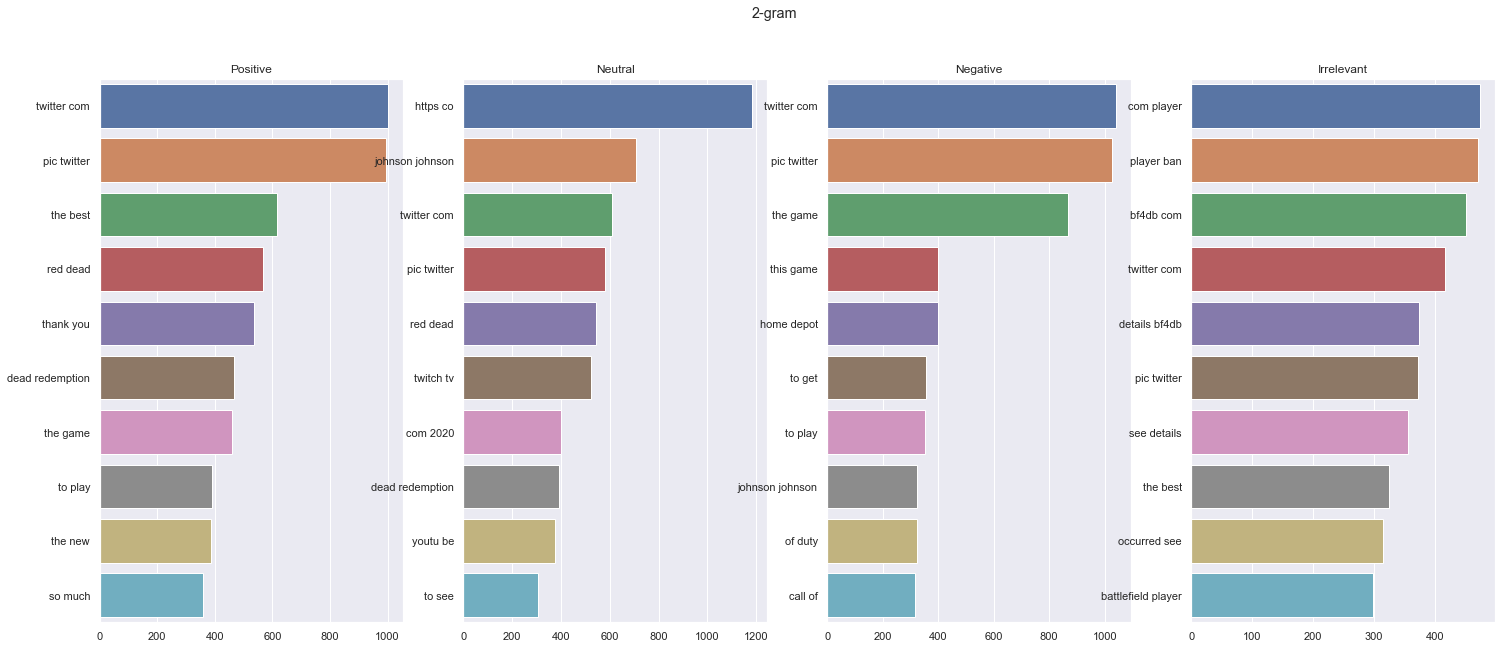

In [20]:
get_top_ngram(df,'sentiment','tweet', n=2)

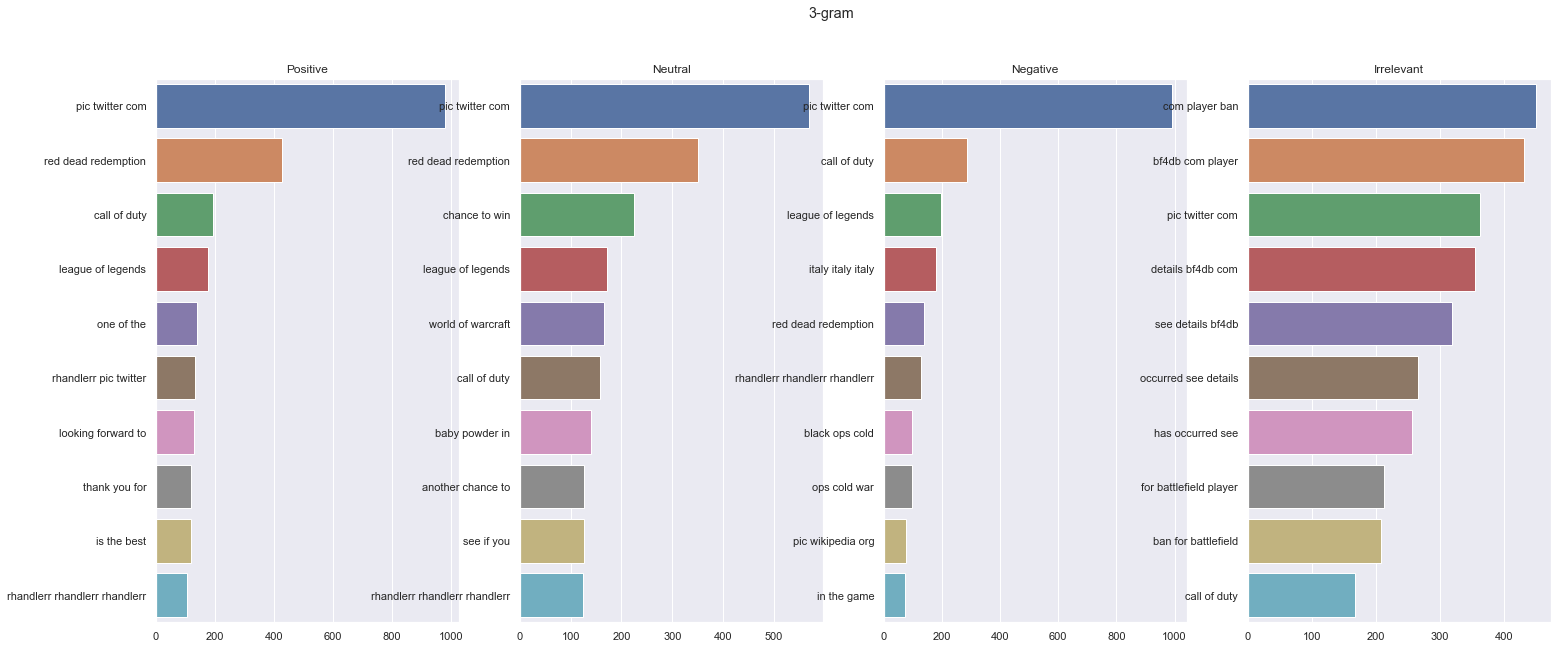

In [21]:
get_top_ngram(df,'sentiment','tweet', n=3)

In [23]:
df.to_csv("data/cleaned_labelled_text.csv", index=False)